# Outlier Detection

## Definition

Outliers are defined typically based on the following assumptions:
1. Outliers are<b> different from the norm with respect to their features</b>
2. A data point which is<b> significantly different from other data points</b>, or does not conform to the expected normal behaviour, or conforms well to a defined <b>abnormal behaviour</b>.

## Types of Outlier

There are 2 types of outlier:  
1. <b> Point Outlier </b>:  an individual data instance that deviates largely from the rest of the dataset.
2. <b> Collective Outlier </b>: a collection of data instances that appear anomalous with respect to the rest of the entire dataset.

## Effect of Outlier on the Model

Outlier has significant effect on the dataset, in <b>decriptive statistics </b> it effects the <i>mean, standard deviation and variance</i> thus it can has effect on the <b>data analysis and statistical modelling </b>.

Here are some example of how outlier effect the model:  
- Linear Regression:  
   <img title='Effect of Ouliter on Linear Regression' src='https://tillbe.github.io/figure/outlier-influence-identification/unnamed-chunk-4-1.png'>  


- Logistics Regression  
  
   <img title='Effect of Ouliter on Linear Regression' src='https://qph.cf2.quoracdn.net/main-qimg-9cf512336f69169d620b852691b51571'>


## Outlier Detection Methods

There are many methods that can be used to detect outliers:  
  
<img style="float: center;" src="Capture1.PNG">

The some conventional methods used for outlier detection are using <b> box plot</b> and <b> using histogram</b>  
  
<img title = 'Boxplot Outlier Detection' style="float: left;" src="Capture2.PNG">

<img style="float: left;" src="Capture3.PNG">

## Outlier Detection Algorithms Pros and Cons

However, there are new advance outlier detection proposed. The table below shows the pros and cons of each methods  
  
<img style="float: left;" src="Capture4.PNG">

## Local Outlier Factor Dection Method (LOF)

<b>Local Outlier Factor (LOF)</b> is an density based outlier detection technique. LOF aims to assign a degree of being an outlier to each data object in a multidimensional data set.  
  
The local outlier factor of a data object p is calculated as the <b>ratio of its local density and those of its k-nearest neighbors</b>. The LOF is local in the term that it only considers restricted neighbors of the object.  
  
  <img style="float: left;" src="Capture5.PNG">

## LOF outlier detection in action

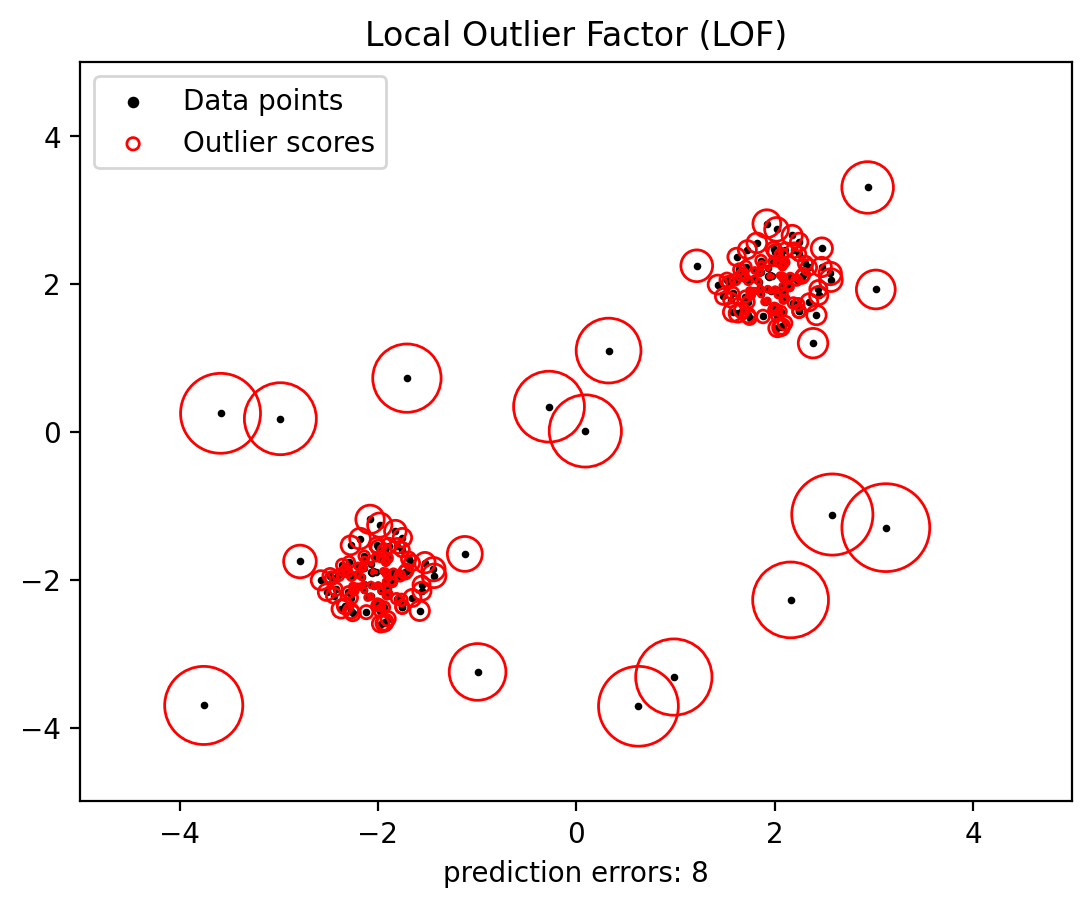

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Outlier Treatment

There are 3 main methods of dealing with outliers, apart from removing them from the dataset.  
- <b>Reducing the weights of outliers (trimming weight)</b>  
    Weight trimming <b>reduces large weights</b> to a <b>fixed cut-off value and adjusts weights below this value </b>to maintain the untrimmed weight sum, reducing variability at the cost of introducing some bias  
      
- <b>Changing the values of outliers (Winsorisation, trimming, imputation)</b>  
     Frequently used in<b> business surveys</b>, so it is presented below in more detail. The <b>general idea of Winsorisation is that if an observation exceeds a pre-set cut-off value, then the observation is replaced by that cut-off value</b> or by a modified value closer to the cut-off value.   
       
- <b>Using robust estimation techniques (M-estimation). </b>  
    A robust regression method often used as an alternative to the least squares method when data has outliers, extreme observations, or does not follow a normal distribution.

## M-Estimation

The “M” indicates that M estimation is of the <b>maximum likelihood type</b>, M-estimators are actually a broad class of estimators that include the <b>maximal likelihood estimator</b>. Least squares estimators and LAV Estimators are also both special cases of M-estimation .

### When to use M-Estimation 

The M-estimator is <b>more efficient than Ordinary Least Squares (OLS) </b>under certain conditions:


1. Your data contains y outliers,
2. The model matrix X is measured with no errors.  
  
M-estimators are especially <b>useful when your data has outliers or is contaminated because one outlier (or heavy tailed errors)</b> can render the normal-distribution based OLS useless; In that case, you have two options: remove the badly-behaving outliers, or use the robust M-estimator.

M-estimation <b> isn’t recommended </b>when:

1. Anomalous data reflects the true population
2. The population is made up of distinct mixture of distributions.

### How M-Estimation work?

M estimation attempts to reduce the influence of outliers by replacing the squared residuals in OLS by another function of the residuals:  
  
  <img title='M-Estimation' src='https://www.statisticshowto.com/wp-content/uploads/2019/10/m-estimation.png'>  